Not unlike the way that the satellite images of the the previous chapter were a "picture" of the world, so too is a T1 image a "picture" of a brain.  The specics of how the dimagnetic properties of water molecules are legeraged, along with the use of a superconducting magnet, to obtain these images are beyond the scope of this lesson book.  For now let us keep the analogy of the jpeg image in mind as we move into a consideration of the nifti itself.

Lets begin by loading it into memory and considering its data size.  Whereas previously we were working with .jpg and .png files, we will now be working with .nifti files, which are typically stored as .nii.gz, which corresponds to a compressed state.

In [2]:
#load the t1
import os
t1Path='/Users/plab/Documents/JupyerData/proj-5c50b6f12daf2e0032f880eb/sub-100206/dt-neuro-anat-t1w.tag-acpc_aligned.tag-brain_extracted.id-5c57072befbc2800526291bb/t1.nii.gz'
T1fileinfo = os.stat(t1Path)
print('T1 size (in bytes)')
print(T1fileinfo.st_size)

import nibabel as nib
img = nib.load('/Users/plab/Documents/JupyerData/proj-5c50b6f12daf2e0032f880eb/sub-100206/dt-neuro-anat-t1w.tag-acpc_aligned.tag-brain_extracted.id-5c57072befbc2800526291bb/t1.nii.gz')

T1 size (in bytes)
3593891


The T1 nifti image we just loaded is about 3.6 MB in size, which is roughly close to a high resolution .jpeg file.  Given what we know about the jpeg image (every pixel has 3 to 4 *integer* values which correspond to its color characteristics), we can get a sense about the number of measurements contained within a nifti, and thus the general amount of "information" (a complex topic we won't go into here) that a nifti image contains about the brain.

However, we don't yet know what the nifti is storing in each of it's voxels (the 3D equivalent of a pixel).  Is it using an integer, or perhps a float of some sort? Lets take a look.

Quite helpfully, the nifti data type features a "header" which contains a great deal of metadata about the nifti image.  Think of it as being similar to the exif data of a normal image.

In [3]:
T1header = img.header
print(T1header)  

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 145 174 145   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.    1.25  1.25  1.25  1.    0.    0.    0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.11'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-1.25 

That's a lot of information!

For now, we'll only briefly consider a few of these features, but will come back to each of these as we proceed through the lesson.

dim:  This field displays the dimensions of the nifti image data object.  The first number (three in this case) indicates the number of dimensions, while the next values (equal to the number indicated to the first) correspond to the size of the objects dimensions.  Thus, in this case the first dimension has 145 entries, the second has 174 entires, and the third has 145 entries.  

datatype:  This field corresponds to the type of numerical data type contained within each of the nifti image data object's entries.  Here we see that it is "float32".  This gives us two primary peices of information: (1) we now know that the numerical entries are *not* integers or whole numbers (and thus they can adopt values between 1,2,3, etc.)  and (2) we now know that each of these entries takes up about 4 bytes.  

pixdim:  Ignoring the initial (-1) and last three values in this field (0. 0. 0.), we see the numbers 1.25 1.25 1.25 and 1.   These indicate the size of the real world entities that correspond to the nifti image data object's entries.  In the case of the map from the previous chapter, this would have corresponded roughly to hundreds (A complex issue given that the pixels dont correspond the same surface area size) of square miles.  In this case, we see that each of these values is 1.25 millimeters, which means that the number in any entry of the nifti represents a 1.25 by 1.25 by 1.25 (1.25^3 = 1.953125) cubic millimeter volume of the space.  The fifth value (1) isn't particularly relevant to this particular nifti, as our nifti data object is only 3 dimensional, but if it were 4 dimensional (as would be the case with a fmri data output or a dmri data output) this would indicate the number of measures in that axis. 

Also, its important to note that all three of these dimension measures are the same.  This need not be the case, and it could be that our voxels are actually representing units of space whose sides are not all equal.  In this case though, we can say that the voxels are "isometric", meaning that all faces are the same size.


qform_code:  This field specifies the orientation schema that will be detailed in subsequent fields.  In the previous lesson we considered the prime maridian and equator as the two components of the major orientation schema we used (longitude and latitude).  But imagine that we instead used some other coordinate system to establish a "zero" point (or origin) of some sort.  We would then need to find a way to indicate that we were no longer using that latitude system.  This is a similar sort of characteristic for nifti data.  Here, we have some indicator ("mni" or "talarach", for example) that establish for us what we consider to be a common point of reference.  "mni" and "talarach" each correspond to the standard Montreal Neurological Institute [citation] and Talairach [citation] atlases.  Talairach  schema the (0,0,0) point corresponds to the anterior commisure [confirm this], while in the "MNI" schema the (0,0,0) point corresponds to the posterior commisure.


qoffset_x, qoffset_y , qoffset_z:  These numbers are the transforms necessary to align this image to the reference specified in "qform_code".  Referring back to our previous lessons, you can think of these numbers as the shift needed to align the political map with the geographic map. Now though, we have three dimensions and need to align all three.  Furthermore, our primary goal when doing this alignment (in accordance with the specified "mni" coordinate scheme), is to make sure that the posterior comissure is located at (0,0,0) once the relvant shifts are performed.         

Lets move on from the header information and take a look at the data object itself.

In [4]:
print('Data dimensions')
print('(How many data entries in each dimension)')
dataDimensions=img.shape
print(dataDimensions)

Data dimensions
(How many data entries in each dimension)
(145, 174, 145)


Here we are no longer indexing into the header, but we nontheless see that the size of the image data is (145,174,145), which is consistent with the information we obtained from the "dim" field of the header.

We can also use the functionality of the nibabel python package to obtain the dimensions of the voxels in this nifti.

In [5]:
print('Voxel dimensions for T1 (in mm)')
voxelDims=img.header.get_zooms()
print(voxelDims)

Voxel dimensions for T1 (in mm)
(1.25, 1.25, 1.25)


Now, given that we have the size of an individual voxel and the dimensions of the entire data block we can compute the amount of space that this nifti represents. 

In [6]:
print('How much total space does this representation correspond to?')
print('')
print(f'{dataDimensions[0]*voxelDims[0]} mm by {dataDimensions[1]*voxelDims[1]} mm by {dataDimensions[2]*voxelDims[2]} mm' )

How much total space does this representation correspond to?

181.25 mm by 217.5 mm by 181.25 mm


Lets actually index into a specific voxel and see what information is stored there.  From the header, we know that it will be a float value, but we dont, as of yet, have a ballpark sense of what this value will be.

In [7]:
data = img.get_fdata()
data[96,86,57]

851.6476440429688

That value gives a sense of what sort of numbers this nifti object contains, but what about all of the others, how can we get a sense of those?  Lets explore this by plotting a histogram of the T1 data values for each voxel.  In addition to this, we can also get a sense of what how many total voxels there are, how many are "non-zero" (in that they contain information), and what proportion of the total number of voxels this corresponds to. 

Total number of voxels
3658350

Minimum voxel value
-31.94868278503418

Maximum voxel value
1591.8572998046875

Number of voxel values less than or equal to zero
2685933

Number of voxel values greater than zero
972417

Proportion of entries greater than zero (i.e. containing data)
0.2658075361843454



Text(0.5, 1.0, 'Distributon of voxel values  greater than zero')

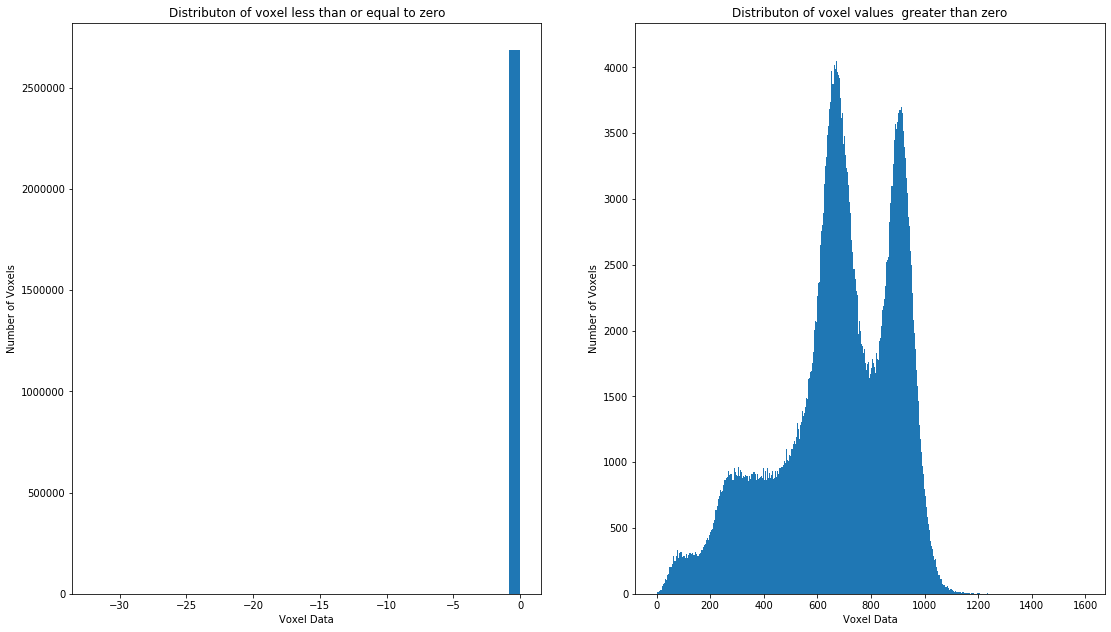

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
unwrappedData=np.ndarray.flatten(data)


print('Total number of voxels')
voxTotal=dataDimensions[0]*dataDimensions[1]*dataDimensions[2]
print(voxTotal)
print('')

print('Minimum voxel value')
print(np.min(unwrappedData))
print('')

print('Maximum voxel value')
print(np.max(unwrappedData))
print('')

splitPoint=0

def smallVal(n): 
    return n<=splitPoint
def largeVal(n):
    return n>splitPoint

result=map(smallVal,unwrappedData)
smallBool=list(result)

result=map(largeVal,unwrappedData)
largeBool=list(result)

print('Number of voxel values less than or equal to zero')
print(sum(smallBool))
print('')

print('Number of voxel values greater than zero')
print(sum(largeBool))
print('')

print('Proportion of entries greater than zero (i.e. containing data)')
print(sum(largeBool)/voxTotal)
print('')

plt.subplot(1, 2, 1)
plt.hist(unwrappedData[smallBool], bins=40)
plt.xlabel('Voxel Data')
plt.ylabel('Number of Voxels')
plt.title('Distributon of voxel less than or equal to zero')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(1, 2, 2)
plt.hist(unwrappedData[largeBool], bins=1000)
plt.xlabel('Voxel Data')
plt.ylabel('Number of Voxels')
plt.title('Distributon of voxel values  greater than zero')

It seems that about a quarter of the voxels contain data that we would consider to be reprsentatve of the brain.  Depending on whether or not this T1 has had the brain "extracted" (i.e. the brain isolated from the rest of the head, neck, and body), this proporation may also include non-brain tissues.  Furthermore, note how we had to split the histogram in two.  Had we not done this, the number of empty voxels would have overwhelmed the visualization and we wouldn't have been able to observe the distribution visible in the plot on the right.

Now that we have a sense of the numerical variability of the data in this nifti, lets get a sense of how these values are laid out spatially.  Keep in mind that, just like a jpeg wherein the i,j entry of the data array represents a portion of space that spatially adjacent to the i,j-1 (or i,j+1, or i+1,j etc.), the i,j,k entry of a nifti is spatially adjacent to the i,j,k+1 entry.

In [9]:
from niwidgets import NiftiWidget
from niwidgets import examplet1

T1Path='/Users/plab/Documents/JupyerData/proj-5c50b6f12daf2e0032f880eb/sub-100206/dt-neuro-anat-t1w.tag-acpc_aligned.tag-brain_extracted.id-5c57072befbc2800526291bb/t1.nii.gz'


test_widget = NiftiWidget(T1Path)

test_widget.nifti_plotter()




<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=72, continuous_update=False, description='x', max=144), IntSlider(value=…

Take a moment to shift through the nifti image plotted above.  If you want a more standard visualization, feel free to switch the colormap to gray.  As a challenge, try and shift the x, y, and z slizes to cross at the posterior commisure, and take note of the coordinates of this point.  Right now, its worth noting that the left, posterior, inferior corner is the 0 coordinate.  The coordinate shift that results in the posterior commisure being at (0,0,0) occurs after the qoffset information has been applied.  After this shift has been performed locations in the left hemisphere are characterized by coorinates that have a negative first value (x coordinate).

The notion of a shift gets a bit more complicated in three dimensions, as it is possible to have your data rotated or flipped along multiple dimensions.  With a standard 2d image this would have been quite obvious (you would notice if the world had been rotated 90% or flipped such that Russia was west of the US's "east" coast).  Although some of these changes are obvious in a nifti image (for example a 90 degree rotation), some are less obvious.  For example, as it turns out this brain is flipped in the x axis such that the right hemisphere is plotted on the left and the left hemisphere is plotted on the right.  Lets take a look at how we would know this.

In [9]:
print('T1 voxel resolution (in mm)')
print(img.header.get_zooms())
print('')


print('T1 voxel affine')
imgAff=img.affine
print(img.affine)
print('')

print('Coordinates of posterior commisure')
imgSpatialTrans=np.abs([imgAff[0,3]/imgAff[0,0],imgAff[1,3]/imgAff[1,1],imgAff[2,3]/imgAff[2,2]])
print(imgSpatialTrans)
print('')



T1 voxel resolution (in mm)
(1.25, 1.25, 1.25)

T1 voxel affine
[[  -1.25    0.      0.     90.  ]
 [   0.      1.25    0.   -126.  ]
 [   0.      0.      1.25  -72.  ]
 [   0.      0.      0.      1.  ]]

Coordinates of posterior commisure
[ 72.  100.8  57.6]



Above we again see various components of information that could also have been found in the header.  From this, how do we know that the x dimension is flipped?  If we look at the first line of the affine we see that the 1.25 value is negative while the 90 is not which is in conflict with the other entires on the diagonal, and the other entries in the column on the right (excluding the 1 in the bottom right).  This tells us that the x dimension has been flipped.  Were they all the same sign, this would indicate that no single dimension had been flipped (and was thus out of place relative to the others).

Now that we have a sense of 